In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/DELL/Downloads/mcdonalds.csv")

In [3]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
df.shape

(1453, 15)

In [7]:
df1=df.iloc[:,0:11].replace("Yes",1).replace("No",0)

In [8]:
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [9]:
mean=round(df1.mean(),2)

In [10]:
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca=PCA()
df1_pca=pca.fit_transform(df1)
df1_p=pca.fit(df1)
SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum


,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [16]:
print("Standard Deviation:\n",SD.round(1))

load = (pca.components_)
i=0
rot_matrix = df1_p.components_.T

rot_df = pd.DataFrame(rot_matrix, index=df1.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df


Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


IndexError: index 11 is out of bounds for axis 0 with size 11

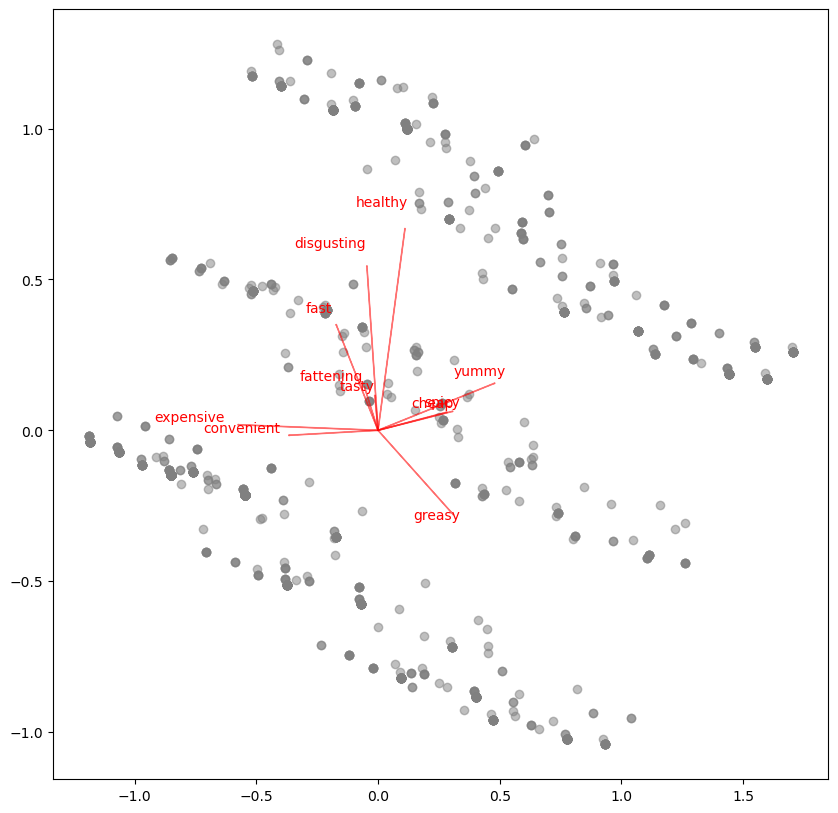

In [17]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data points
ax.scatter(df1_pca[:, 0], df1_pca[:, 1], c='grey', alpha=0.5)

# Plot the variable loadings as vectors
for i, var in enumerate(df.columns.values):
    ax.arrow(0, 0, -load[i, 0], -load[i, 1], color='r', alpha=0.5)
    ax.text(-load[i, 0]*1.1, -load[i, 1]*1.1, var, ha='right', va='bottom', color='r')

# Add labels to the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Show the plot
plt.show()

In [18]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Set random seed
np.random.seed(1234)

# Run KMeans with 2 to 8 clusters and select the best based on silhouette score
best_score = -1
best_model = None
best_n_clusters = None
for n_clusters in range(2, 9):
    for _ in range(10):
        model = KMeans(n_clusters=n_clusters)
        model.fit(df1.x)
        score = model.score(df1.x)
        if score > best_score:
            best_score = score
            best_model = model
            best_n_clusters = n_clusters

# Relabel the clusters
labels = best_model.labels_

ModuleNotFoundError: No module named 'sklearn_extra'

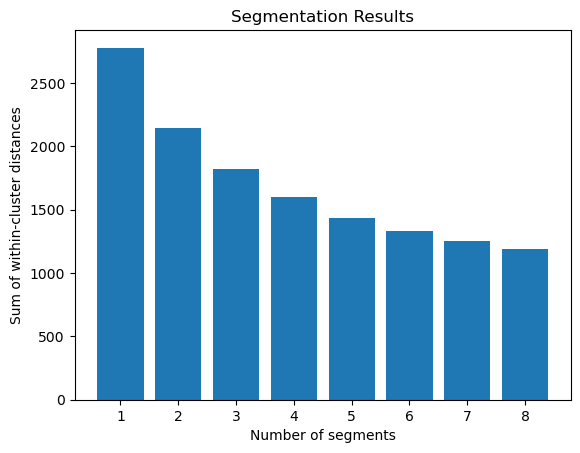

In [16]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
df1_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(df1)
    within_cluster_distances.append((kmeans.inertia_))
    df1_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

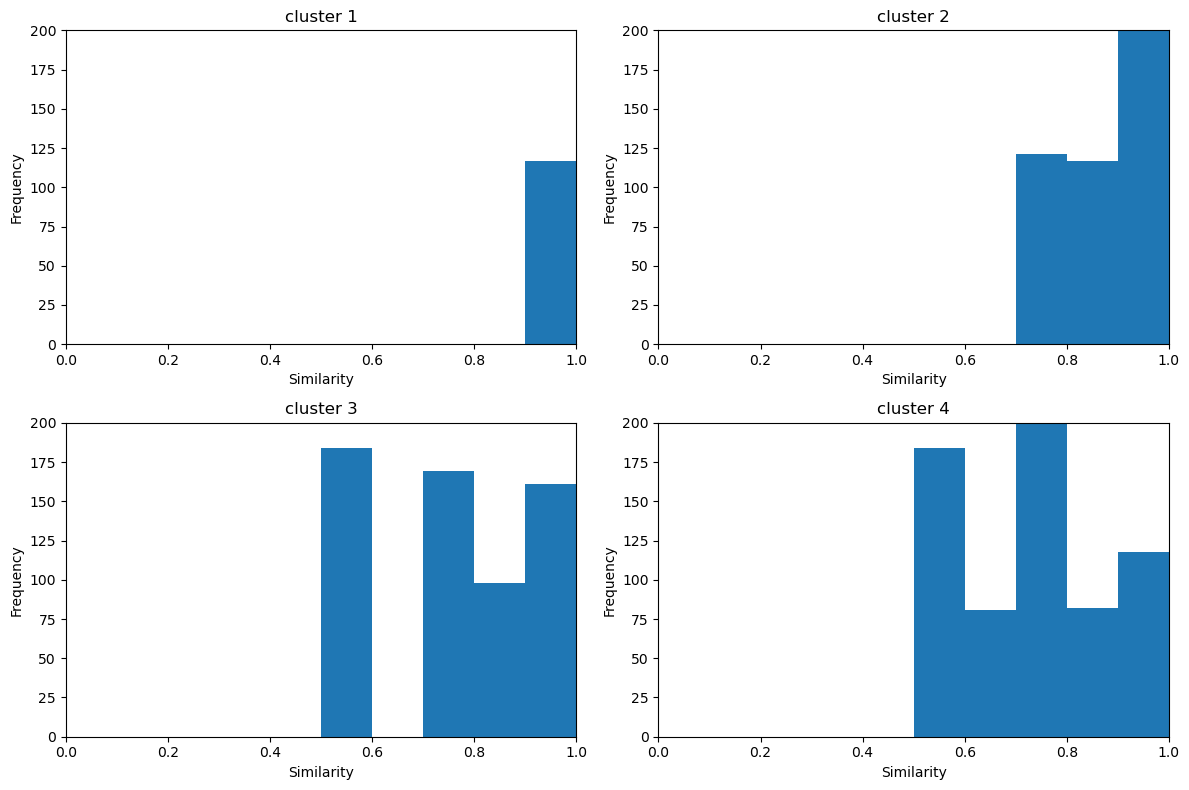

In [22]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = df1_km28[str(i)].predict(df1)
    similarities = df1_km28[str(i)].transform(df1).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming silhouette_scores is a list of silhouette scores for each number of clusters
silhouette_scores = [...]  # Fill this with your silhouette scores

# Plotting
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Segments')
plt.grid(True)
plt.show()

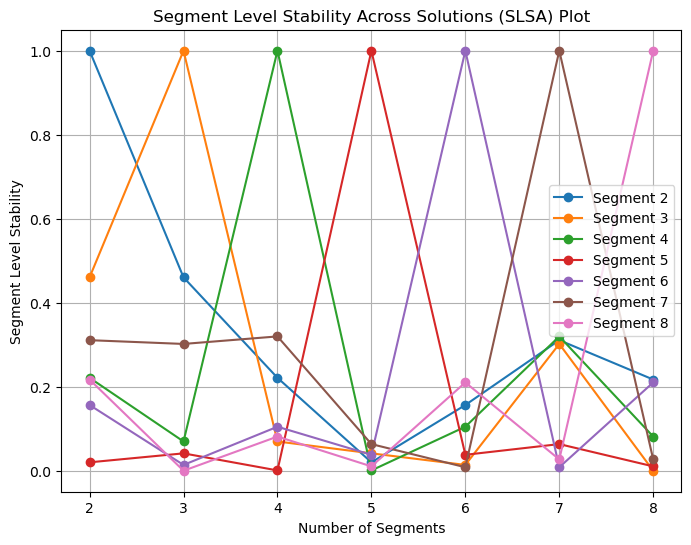

In [23]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = df1_km28[str(segment)].predict(df1)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

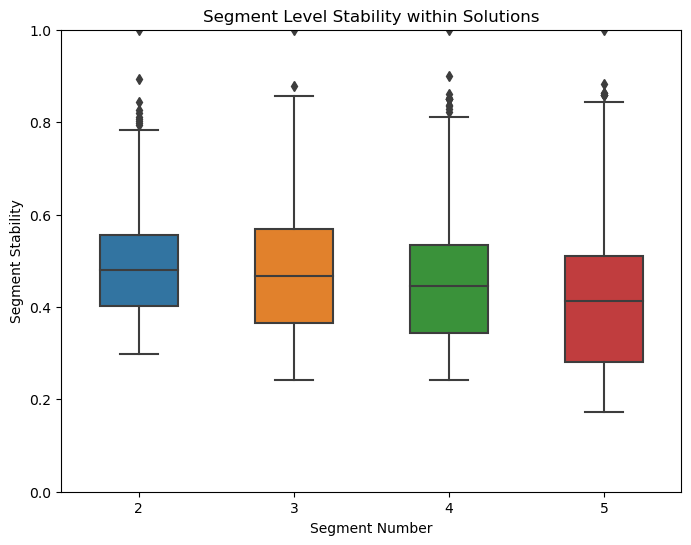

In [24]:
segment_solutions = ["2", "3", "4", "5"]
segment_similarities = {}

for segment in segment_solutions:
    segment_similarities[segment] = df1_km28[segment].transform(df1).min(axis=1)

plt.figure(figsize=(8, 6))

# Create a DataFrame to hold the data
data = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    data.extend(zip([segment]*len(normalized_similarities), normalized_similarities))

df = pd.DataFrame(data, columns=['Segment Number', 'Segment Stability'])

# Plot using seaborn
sns.boxplot(data=df, x='Segment Number', y='Segment Stability', width=0.5, whis=1.5)

plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [26]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
df1_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(df1.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = df1.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    df1_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
df1_m28 = pd.DataFrame(df1_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(df1_m28)

E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     8       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     9       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     7       True  4   4 -1602.986015  3213.972030  3235.097572  3233.753684
3    13       True  5   5 -1435.324786  2880.649571  2907.056500  2905.465473
4    10       True  6   6 -1332.150483  2676.300966  2707.989280  2706.201149
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6    10       True  8   8 -1191.580948  2399.161896  2441.412982  2439.379225


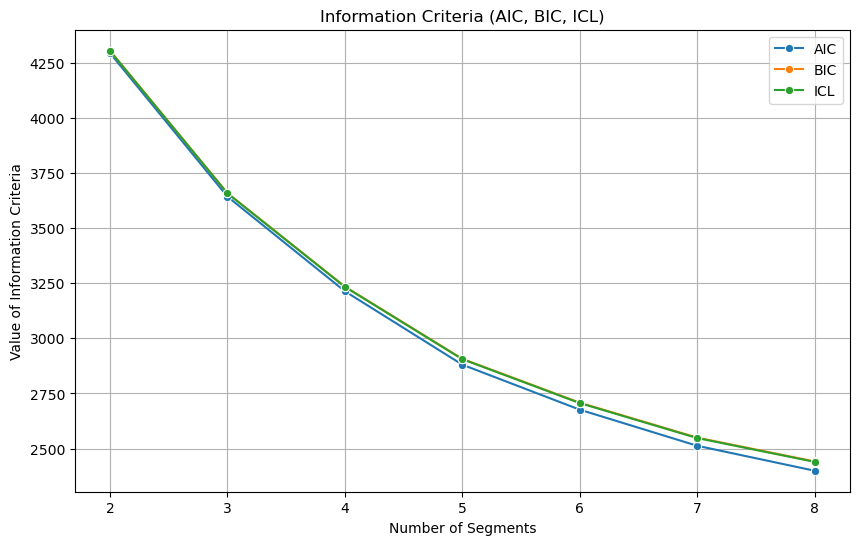

In [27]:
num_segments = df1_m28["k"]
AIC_values = df1_m28["AIC"]
BIC_values = df1_m28["BIC"]
ICL_values = df1_m28["ICL"]

plt.figure(figsize=(10, 6))

# Create a DataFrame to hold the data
data = pd.DataFrame({'Number of Segments': num_segments, 'AIC': AIC_values, 'BIC': BIC_values, 'ICL': ICL_values})

# Plot using seaborn
sns.lineplot(data=data, x='Number of Segments', y='AIC', marker='o', label='AIC')
sns.lineplot(data=data, x='Number of Segments', y='BIC', marker='o', label='BIC')
sns.lineplot(data=data, x='Number of Segments', y='ICL', marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [30]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(df1)
kmeans_clusters = kmeans.predict(df1)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(df1)
gmm_clusters = gmm.predict(df1)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

df1_m4 = df1[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(df1_m4)
k4_m4_clusters = k4_m4.predict(df1_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


mixture    0    1    2    3
kmeans                     
0         99    5  253    7
1          0  211   24    5
2        500    0    0   33
3         22   38    0  256
kmeans   0   1   2   3
kmeans                
0       29  10  17  23
1       18   8  12  11
2       45  14  31  19
3       29   5  15  15


In [31]:
from sklearn.mixture import GaussianMixture

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(df1)

log_likelihood_m4a = gmm_m4a.score(df1)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(df1)

log_likelihood_m4 = gmm_m4.score(df1)

print("Log-likelihood for df1_m4a:", log_likelihood_m4a)
print("Log-likelihood for df1_m4:", log_likelihood_m4)

Log-likelihood for df1_m4a: 9.456781748071885
Log-likelihood for df1_m4: 3.6427464011765815
